In [ ]:
#importing libraries
import numpy as np #used for mathematical calculation
import pandas as pd  #for analysing of data 
import matplotlib.pyplot as plt # for visulaization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student.data.csv')

In [ ]:
df.head()

,stu_hrs,stu_marks
0,5.67,74.40
1,6.76,78.70
2,8.45,79.45
3,5.56,65.43
4,NaN,73.23


In [ ]:
df.shape

(133, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   stu_hrs    130 non-null    float64
 1   stu_marks  133 non-null    float64
dtypes: float64(2)
memory usage: 2.2 KB


In [ ]:
df.describe()

,stu_hrs,stu_marks
count,130.000000,133.000000
mean,7.418400,77.284947
std,1.316918,10.429882
min,4.760000,54.450000
25%,6.350500,69.990000
50%,7.365000,78.430000
75%,8.450000,84.760000
max,10.450000,96.443000


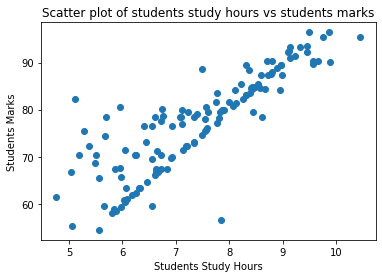

In [ ]:
plt.scatter(x = df.stu_hrs , y = df.stu_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students Marks")
plt.title("Scatter plot of students study hours vs students marks")
plt.show()

In [ ]:
# data cleaning 

In [ ]:
df.isnull().sum()

stu_hrs      3
stu_marks    0
dtype: int64

In [ ]:
df.mean()

stu_hrs       7.418400
stu_marks    77.284947
dtype: float64

In [ ]:
df2 = df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

stu_hrs      0
stu_marks    0
dtype: int64

In [ ]:
df2.head()

,stu_hrs,stu_marks
0,5.6700,74.40
1,6.7600,78.70
2,8.4500,79.45
3,5.5600,65.43
4,7.4184,73.23


In [ ]:
#split data

In [ ]:
X =df2.drop("stu_marks", axis = "columns")  
y =df2.drop("stu_hrs", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (133, 1)
shape of y =  (133, 1)


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test   = train_test_split(X,y, test_size = 0.2 , random_state=51)
print("shape of X_train  : ", X_train.shape)
print("shape of y_train  : ", y_train.shape)
print("shape of X_test   : ", X_test.shape)
print("shape of y_test   : ", y_test.shape)

shape of X_train  :  (106, 1)
shape of y_train  :  (106, 1)
shape of X_test   :  (27, 1)
shape of y_test   :  (27, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_ #this is value of m

array([[6.74647869]])

In [ ]:
lr.intercept_ #this is value of c 

array([26.96856907])

In [ ]:
lr.predict([[4]])[0][0].round(2)

53.95

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[69.20152569],
       [66.09814549],
       [82.62701829],
       [85.66293371],
       [71.96758196],
       [90.72279273],
       [77.01664661],
       [79.79349724],
       [64.47899061],
       [83.77391967],
       [66.570399  ],
       [78.03941278],
       [83.03180702],
       [70.22699046],
       [81.41265213],
       [89.23856742],
       [84.17870839],
       [83.97631403],
       [67.78476517],
       [86.27011679],
       [62.58997657],
       [63.93927231],
       [72.37237068],
       [79.25377895],
       [84.92082105],
       [77.49969449],
       [72.50730025]])

In [ ]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns =["stu_hrs", "stu_org_marks","stu_marks_predicted"])

,stu_hrs,stu_org_marks,stu_marks_predicted
0,6.2600,70.32,69.201526
1,5.8000,58.00,66.098145
2,8.2500,82.32,82.627018
3,8.7000,90.43,85.662934
4,6.6700,66.79,71.967582
5,9.4500,92.21,90.722793
6,7.4184,73.23,77.016647
7,7.8300,79.54,79.793497
8,5.5600,54.45,64.478991
9,8.4200,84.43,83.773920


## fine tune method

In [ ]:
lr.score(X_test,y_test)

0.719742775939503

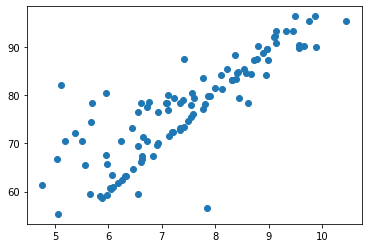

In [ ]:
plt.scatter(X_train,y_train)

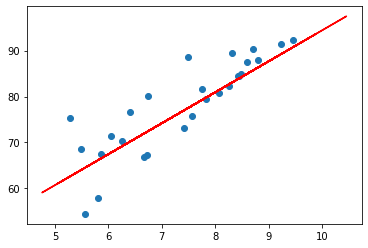

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

## save model

In [ ]:
import joblib
joblib.dump(lr, "student_marks_predictor_model.pkl")  

['student_marks_predictor_model.pkl']

In [ ]:
model = joblib.load("student_marks_predictor_model.pkl")

In [ ]:
model.predict([[0.2]])[0][0].round(2)

28.32